# Machine Learning
### Assignment 3



# **Part A**
**1.Import appropriate libraries**

In [2]:
#pandas used for data manipulation
import pandas as pd
#numpy for numerical analysis
import numpy as np
#for visualizations
import matplotlib.pyplot as plt
#train_test_split function from the sklearn.model_selection module.
from sklearn.model_selection import train_test_split
#Linear regression function from sklearn module.
from sklearn.linear_model import LinearRegression

**2.Read the csv file into a dataframe using appropriate function**

In [3]:
# importing files from colab
from google.colab import files
uploaded =files.upload()

Saving compensation-a1.csv to compensation-a1.csv


In [4]:
#reading the file using read_csv function
df = pd.read_csv('compensation-a1.csv')

In [5]:
# performing data cleaning
datacleaning = df.isna().sum()
print("Perform Data Cleaning column wise:")
print(f"The values are:\n {datacleaning}")
duplicate_rows = df.duplicated().sum()
print(f"duplicated rows are:{duplicate_rows}")

Perform Data Cleaning column wise:
The values are:
 Salaries        0
otherben        0
compensation    0
dtype: int64
duplicated rows are:5008


In [6]:
# checking for null values
df.isnull().sum()

Salaries        0
otherben        0
compensation    0
dtype: int64

In [7]:
# droping na values
df.dropna(inplace=True)
# droping duplicates in that dataset
df.drop_duplicates(inplace=True)

**3.Describe your dataset using appropriate function of pandas**

In [8]:
# using describe function to find count,mean,std,min etc
print(df.describe())

            Salaries       otherben   compensation
count  286817.000000  286817.000000  286817.000000
mean    64042.191526    4703.238569   99209.193921
std     44430.713170    3779.205862   67406.961038
min    -68771.780000  -10636.500000  -74082.610000
25%     24996.000000    1675.040000   38714.570000
50%     63190.260000    4420.530000   99201.050000
75%     93368.920000    6869.320000  142999.600000
max    515101.800000   35157.630000  653498.150000


**4. Plot each input feature against the output feature/target into a scatter plot to see if there is a linear trend**

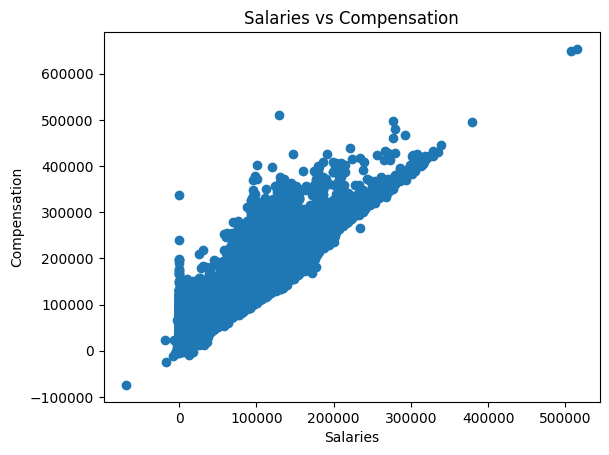

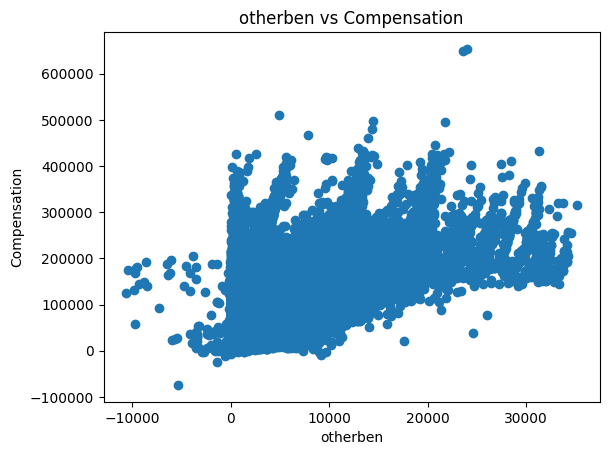

In [9]:
'''
 Iterate through each feature
[:-1] is a slicing operation that excludes the last element from the list of columns.
'''
for col in df.columns[:-1]:
# df[col] is the col with only salaries and other benefits
  plt.scatter(df[col], df["compensation"])
# labeling x axis for each plot
  plt.xlabel(col)
# labeling y axis for both plot
  plt.ylabel("Compensation")
# title of the plot according to x,y values
  plt.title(f"{col} vs Compensation")
  plt.show()


**5. Define a separate dataframe X and y representing input and target features**

In [10]:
# for x drops the compensation column or target features
X = df.drop("compensation", axis=1)
# y only stores compensation
y = df["compensation"]


**6. Use appropriate function to split the dataset into training and testing partitions**

In [11]:
'''
X_train: contains training data for the features.
X_test: contains testing data for the features.
y_train: contains training data for the target variable.
y_test: contains testing data for the target variable.
'''
#test size 0.2 means that 20% will be testing set and rest 80% will be training
#random state 58 means that after each time the random
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


**7. Create an instance of LinearRegression.**

In [12]:
# creating instance model
model = LinearRegression()

**8. Call the fit method for multiple linear regression using all input features.**

In [13]:
#x train is the training features set
#x tain is the traning data for the testing variable
model.fit(X_train, y_train)

LinearRegression()

**9. Predict the values for y_test and plot the true and predicted values**

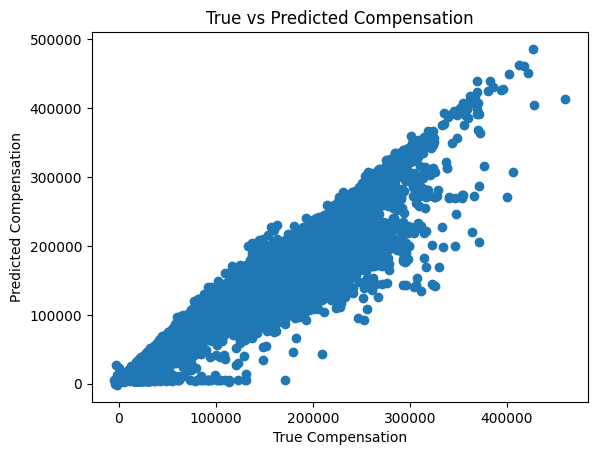

In [14]:
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("True Compensation")
plt.ylabel("Predicted Compensation")
plt.title("True vs Predicted Compensation")
plt.show()


**10. Print the score (r2).**

In [ ]:
r2_score = model.score(X_test, y_test)
print(f"R-squared score: {r2_score:.2f}")


R-squared score: 0.94


#**Part B**

**7. After step 6 in above, perform Kfold validation using 3, 5 and 10 splits and report the validation score after each fold.**


In [15]:
from sklearn.model_selection import KFold


kfold3 = KFold(n_splits=3, shuffle=True, random_state=58)
kfold5 = KFold(n_splits=5, shuffle=True, random_state=58)
kfold10 = KFold(n_splits=10, shuffle=True, random_state=58)

# Function to perform K-Fold validation and print scores
def kfold_validation(kfold, X, y):
  model = LinearRegression()
  scores = []
  for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(score)
  print(f"K-Fold ({kfold.n_splits}) Scores: {scores}")
  print(f"Average Score: {sum(scores)/len(scores):.2f}")

# Perform validation for each K-Fold
kfold_validation(kfold3, X, y)
kfold_validation(kfold5, X, y)
kfold_validation(kfold10, X, y)


K-Fold (3) Scores: [0.9444050492696087, 0.9451876118991162, 0.9444775379740702]
Average Score: 0.94
K-Fold (5) Scores: [0.9448143201223179, 0.9443895240540513, 0.9443972314088968, 0.9456347756036868, 0.9442031823274027]
Average Score: 0.94
K-Fold (10) Scores: [0.9445958253346001, 0.9450276079590845, 0.9435846240720012, 0.9452061225056949, 0.9437067124626792, 0.9450861857022612, 0.9458640269914163, 0.9454050060774445, 0.9443225028130614, 0.9440835361825706]
Average Score: 0.94
